In [27]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import json

In [28]:
df=pd.read_json('inputJson.txt')

In [29]:
df.head()

,SESSIONNUMBER,SESSIONTYPE,Checks
0,2182262,EA,"{'ID': '00083', 'Text': 'Define Session Scope'..."
1,2182262,EA,"{'ID': '00089', 'Text': 'Detailed Session Scop..."
2,2182262,EA,"{'ID': '00084', 'Text': 'Landscape', 'Instance..."
3,2182262,EA,"{'ID': '00086', 'Text': 'Products and Componen..."
4,2182262,EA,"{'ID': '00087', 'Text': 'Servers in current La..."


In [30]:
session_data= pd.DataFrame(
    {
        'product_count':[]
    }
)

product_data=pd.DataFrame(
    {
        'session_number':[],
        'checks_id':[]
    }, columns=['session_number','checks_id']
)
session_index=[]
checks_id =[]

In [31]:
session_index

[]

In [37]:
for indx in df.index:
    checks_id.append(int(df['Checks'][indx]['ID']))
    session_index.append(int(df['SESSIONNUMBER'][indx]))

product_data['session_number'] = session_index
product_data['checks_id'] = checks_id


C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


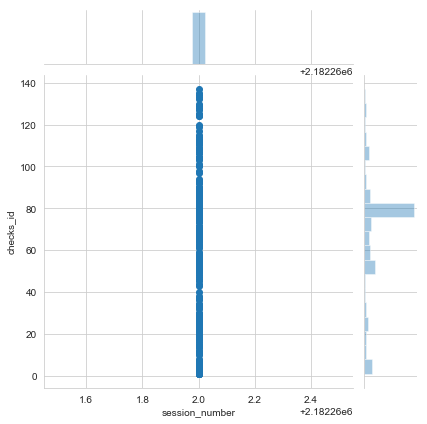

In [38]:
sns.jointplot(x='session_number', y='checks_id', data=product_data)

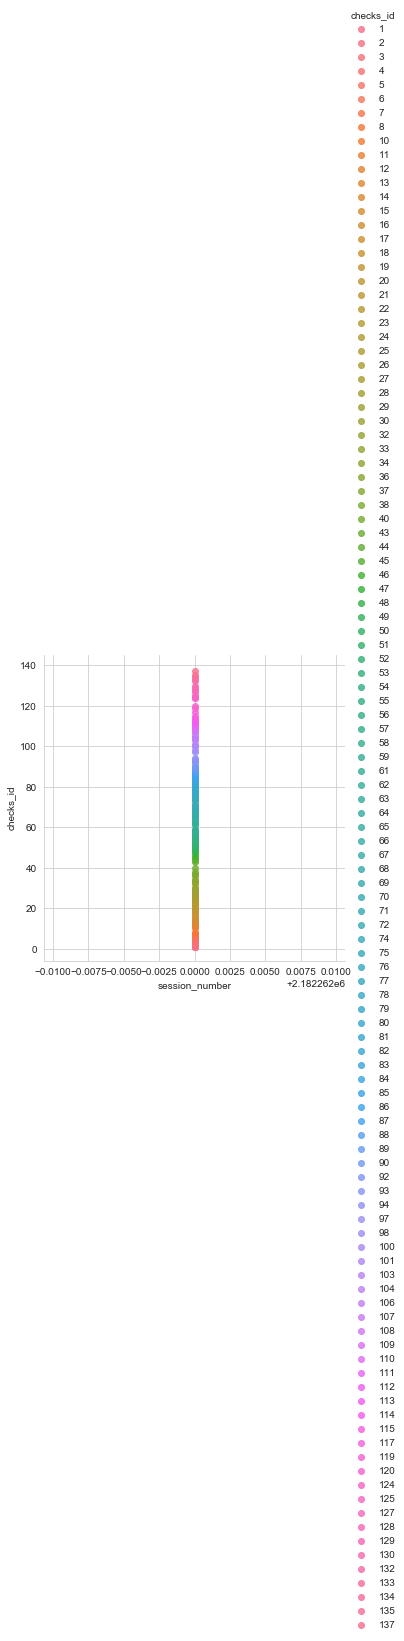

In [39]:
sns.lmplot(x='session_number', y= 'checks_id', data=product_data,
           fit_reg=False, # No regression line
           hue='checks_id')

(0, 2182262.010631443)

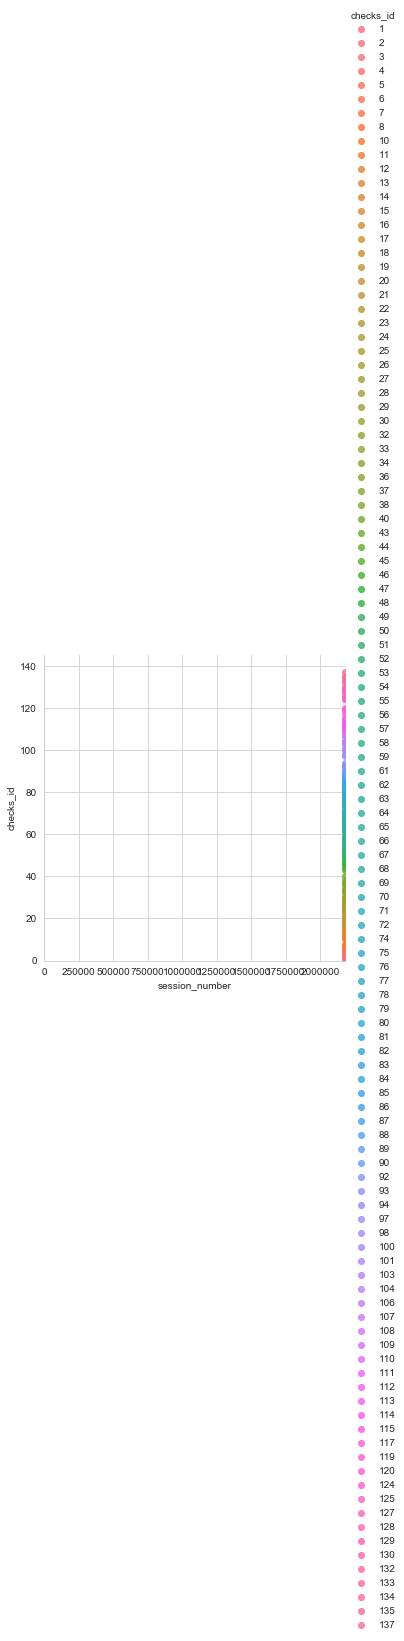

In [40]:
sns.lmplot(x='session_number', y= 'checks_id', data=product_data,
           fit_reg=False, # No regression line
           hue='checks_id')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

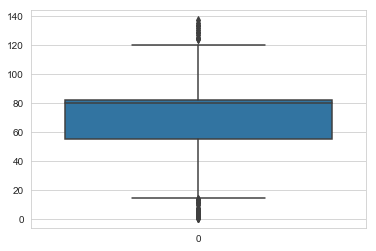

In [53]:
sns.boxplot(data=[product_data.checks_id])

C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


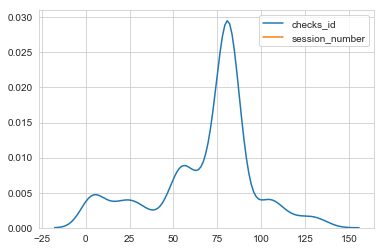

In [57]:
# Density Plot
sns.kdeplot(product_data['checks_id'])
sns.kdeplot(product_data['session_number'])
#, data=product_data[['session_number', 'checks_id']]

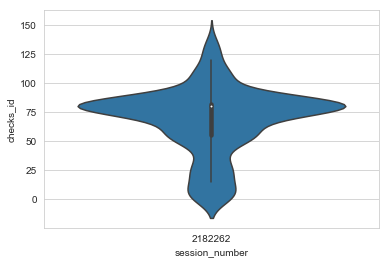

In [43]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='session_number', y='checks_id', data=product_data)

In [44]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

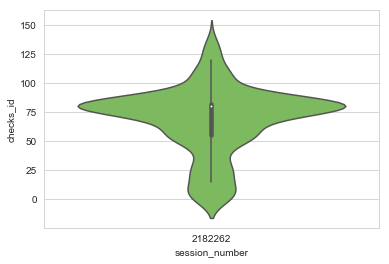

In [45]:
# Violin plot with Pokemon color palette
sns.violinplot(x='session_number', y='checks_id', data=product_data, 
               palette=pkmn_type_colors) # Set color palette

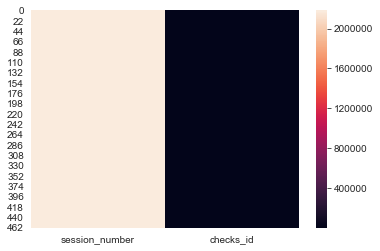

In [46]:
sns.heatmap(product_data)

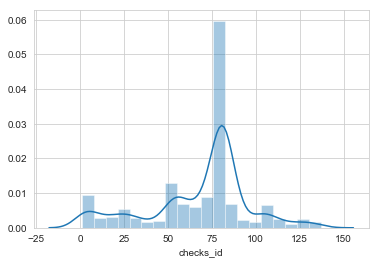

In [47]:
	
# Distribution Plot (a.k.a. Histogram)
sns.distplot(product_data.checks_id)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 <a list of 115 Text xticklabel objects>)

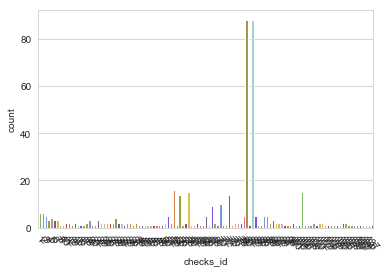

In [48]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='checks_id', data=product_data, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


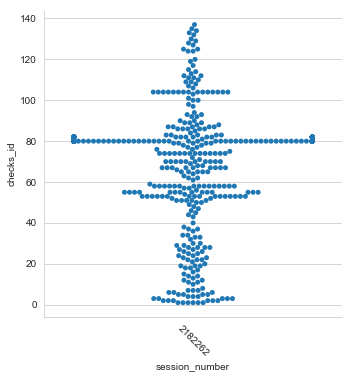

In [50]:
# Factor Plot
g = sns.factorplot(y='checks_id', 
                   x='session_number', 
                   data=product_data, 
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)